# Imports and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path


# Creating a base directory (relative path)
data_dir = Path("../Data")
pd.set_option('display.max_columns', None)


marketData = pd.read_csv(data_dir / "slim_massachusetts_market_data.csv")

# Skiprows for not reading the reader of the files
Crime2024 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2024.csv", skiprows=5)
Crime2023 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2023.csv", skiprows=5)
Crime2022 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2022.csv", skiprows=5)
Crime2021 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2021.csv", skiprows=5)
Crime2020 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2020.csv", skiprows=5)
Crime2019 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2019.csv", skiprows=5)
Crime2018 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2018.csv", skiprows=5)
Crime2017 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2017.csv", skiprows=5)
Crime2016 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2016.csv", skiprows=5)
Crime2015 = pd.read_csv(data_dir / "Number of Crimes by Offense Type_2015.csv", skiprows=5)

In [2]:
# Filtering MA state housing data only
marketData = marketData[marketData["STATE"] == "Massachusetts"]
marketData

,PERIOD_BEGIN,PERIOD_END,PERIOD_DURATION,REGION_TYPE,REGION_TYPE_ID,TABLE_ID,REGION,CITY,STATE,STATE_CODE,PROPERTY_TYPE,PROPERTY_TYPE_ID,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,MEDIAN_LIST_PRICE_YOY,MEDIAN_PPSF,MEDIAN_PPSF_MOM,MEDIAN_PPSF_YOY,MEDIAN_LIST_PPSF,MEDIAN_LIST_PPSF_MOM,MEDIAN_LIST_PPSF_YOY,HOMES_SOLD,HOMES_SOLD_MOM,HOMES_SOLD_YOY,PENDING_SALES,PENDING_SALES_MOM,PENDING_SALES_YOY,NEW_LISTINGS,NEW_LISTINGS_MOM,NEW_LISTINGS_YOY,INVENTORY,INVENTORY_MOM,INVENTORY_YOY,MONTHS_OF_SUPPLY,MONTHS_OF_SUPPLY_MOM,MONTHS_OF_SUPPLY_YOY,MEDIAN_DOM,MEDIAN_DOM_MOM,MEDIAN_DOM_YOY,AVG_SALE_TO_LIST,AVG_SALE_TO_LIST_MOM,AVG_SALE_TO_LIST_YOY,SOLD_ABOVE_LIST,SOLD_ABOVE_LIST_MOM,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,PARENT_METRO_REGION,PARENT_METRO_REGION_METRO_CODE,year
0,2018-05-01,2018-05-31,30,place,6,29702,"Methuen, MA",Methuen,Massachusetts,MA,Townhouse,13,379000.0,0.024601,0.083167,216.670974,0.157612,0.250735,194.701087,0.003979,0.029752,4.0,-0.428571,3.000000,5.0,0.666667,-0.375000,5.0,0.250000,-0.545455,3.0,0.000000,-0.625000,0.8,0.4,-7.2,25.0,18.0,-29.0,1.012871,-0.001857,0.012871,0.750000,0.035714,0.750000,0.333333,NaN,0.083333,"Boston, MA",14454,2018
1,2021-12-01,2021-12-31,30,place,6,29673,"Mansfield, MA",Mansfield,Massachusetts,MA,Single Family Residential,6,412400.0,-0.131789,-0.140654,287.093496,-0.060435,0.126793,257.586957,-0.036092,-0.018993,11.0,-0.266667,-0.576923,8.0,-0.333333,-0.333333,7.0,-0.500000,-0.363636,6.0,-0.142857,-0.250000,0.5,0.0,0.2,16.0,1.0,-11.0,1.023022,-0.012229,0.018319,0.818182,0.151515,0.279720,0.166667,-0.261905,-0.083333,"Providence, RI",39300,2021
2,2022-11-01,2022-11-30,30,place,6,29654,"Mendon, MA",Mendon,Massachusetts,MA,Single Family Residential,6,569000.0,-0.187142,0.020811,248.992931,-0.119056,-0.013514,306.658879,0.129796,0.071612,1.0,-0.900000,-0.909091,6.0,1.000000,-0.333333,5.0,-0.166667,-0.375000,7.0,-0.125000,0.000000,7.0,6.2,6.4,38.0,9.0,7.0,1.019695,0.016147,0.020241,1.000000,0.500000,0.363636,0.285714,0.035714,0.000000,"Worcester, MA",49340,2022
3,2023-11-01,2023-11-30,30,place,6,35864,"Southbridge Town, MA",Southbridge Town,Massachusetts,MA,Multi-Family (2-4 Unit),4,339900.0,-0.007446,0.038021,158.045977,0.178294,0.266343,212.050610,0.186710,0.005383,1.0,-0.750000,-0.666667,2.0,-0.750000,-0.333333,1.0,-0.800000,-0.666667,3.0,-0.571429,-0.250000,3.0,1.2,1.7,18.0,11.0,-11.0,1.040822,0.018304,0.028329,1.000000,0.500000,0.333333,NaN,NaN,NaN,"Worcester, MA",49340,2023
4,2014-01-01,2014-01-31,30,place,6,29791,"Stoughton, MA",Stoughton,Massachusetts,MA,Single Family Residential,6,262450.0,0.329197,0.033268,176.172045,0.052939,0.070886,156.267921,-0.088731,-0.130261,16.0,-0.200000,0.333333,15.0,0.250000,-0.347826,16.0,2.200000,0.066667,61.0,-0.031746,-0.140845,3.8,0.6,-2.1,88.0,-12.0,-15.0,0.953878,-0.024000,-0.037441,0.062500,-0.187500,-0.187500,0.065574,-0.013791,-0.131609,"Boston, MA",14454,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240293,2021-03-01,2021-03-31,30,place,6,36174,"Wakefield, MA",Wakefield,Massachusetts,MA,Condo/Co-op,3,599900.0,0.152656,0.043304,407.315341,0.071141,-0.038358,336.986752,-0.282014,0.061508,6.0,1.000000,0.500000,10.0,-0.166667,0.250000,6.0,-0.666667,-0.538462,8.0,-0.466667,-0.333333,1.3,-3.7,-1.7,21.0,-13.0,-20.0,1.021338,-0.011660,0.049127,0.500000,0.166667,0.250000,0.250000,0.116667,0.166667,"Boston, MA",14454,2021
240294,2021-05-01,2021-05-31,30,place,6,29564,"Kingston, MA",Kingston,Massachusetts,MA,Single Family Residential,6,NaN,NaN,NaN,253.152575,NaN,-0.053912,NaN,NaN,NaN,2.0,NaN,-0.333333,1.0,NaN,-0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,91.0,1.025257,NaN,0.036472,0.500000,NaN,0.500000,NaN,NaN,NaN,"Boston, MA",14454,2021
240295,2023-08-01,2023-08-31,30,place,6,29649,"Westborough, MA",Westborough,Massachusetts,MA,Single Family Residential,6,5999

In [3]:
# Dropping unecessary columns from market dataset
marketData = marketData.drop(columns=[
    "PERIOD_DURATION",
    "REGION_TYPE",
    "TABLE_ID",
    "PARENT_METRO_REGION_METRO_CODE",
    "PENDING_SALES",
    "PENDING_SALES_MOM",
    "PENDING_SALES_YOY",
    "NEW_LISTINGS",
    "NEW_LISTINGS_MOM",
    "NEW_LISTINGS_YOY",
    "MONTHS_OF_SUPPLY",
    "MONTHS_OF_SUPPLY_MOM",
    "MONTHS_OF_SUPPLY_YOY",
    "MEDIAN_DOM_MOM",
    "MEDIAN_DOM_YOY",
    "AVG_SALE_TO_LIST_MOM",
    "AVG_SALE_TO_LIST_YOY",
    "SOLD_ABOVE_LIST_MOM",
    "SOLD_ABOVE_LIST_YOY"
])


In [4]:
marketData = marketData.rename(columns={"year" : "LISTING_YEAR"})

In [5]:
# Filtering 2015 to 2024 housing information only
marketData = marketData[(marketData["LISTING_YEAR"] >= 2015) & (marketData["LISTING_YEAR"] <= 2024)]
marketData

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE_ID,REGION,CITY,STATE,STATE_CODE,PROPERTY_TYPE,PROPERTY_TYPE_ID,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,MEDIAN_LIST_PRICE_YOY,MEDIAN_PPSF,MEDIAN_PPSF_MOM,MEDIAN_PPSF_YOY,MEDIAN_LIST_PPSF,MEDIAN_LIST_PPSF_MOM,MEDIAN_LIST_PPSF_YOY,HOMES_SOLD,HOMES_SOLD_MOM,HOMES_SOLD_YOY,INVENTORY,INVENTORY_MOM,INVENTORY_YOY,MEDIAN_DOM,AVG_SALE_TO_LIST,SOLD_ABOVE_LIST,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,PARENT_METRO_REGION,LISTING_YEAR
0,2018-05-01,2018-05-31,6,"Methuen, MA",Methuen,Massachusetts,MA,Townhouse,13,379000.0,0.024601,0.083167,216.670974,0.157612,0.250735,194.701087,0.003979,0.029752,4.0,-0.428571,3.000000,3.0,0.000000,-0.625000,25.0,1.012871,0.750000,0.333333,NaN,0.083333,"Boston, MA",2018
1,2021-12-01,2021-12-31,6,"Mansfield, MA",Mansfield,Massachusetts,MA,Single Family Residential,6,412400.0,-0.131789,-0.140654,287.093496,-0.060435,0.126793,257.586957,-0.036092,-0.018993,11.0,-0.266667,-0.576923,6.0,-0.142857,-0.250000,16.0,1.023022,0.818182,0.166667,-0.261905,-0.083333,"Providence, RI",2021
2,2022-11-01,2022-11-30,6,"Mendon, MA",Mendon,Massachusetts,MA,Single Family Residential,6,569000.0,-0.187142,0.020811,248.992931,-0.119056,-0.013514,306.658879,0.129796,0.071612,1.0,-0.900000,-0.909091,7.0,-0.125000,0.000000,38.0,1.019695,1.000000,0.285714,0.035714,0.000000,"Worcester, MA",2022
3,2023-11-01,2023-11-30,6,"Southbridge Town, MA",Southbridge Town,Massachusetts,MA,Multi-Family (2-4 Unit),4,339900.0,-0.007446,0.038021,158.045977,0.178294,0.266343,212.050610,0.186710,0.005383,1.0,-0.750000,-0.666667,3.0,-0.571429,-0.250000,18.0,1.040822,1.000000,NaN,NaN,NaN,"Worcester, MA",2023
6,2021-10-01,2021-10-31,6,"Belchertown, MA",Belchertown,Massachusetts,MA,All Residential,-1,305250.0,-0.389378,0.061739,171.149144,-0.358961,0.156365,164.809223,-0.294475,0.029887,1.0,-0.666667,-0.666667,7.0,-0.300000,-0.500000,42.0,0.988235,0.000000,0.285714,0.185714,NaN,"Springfield, MA",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240292,2022-01-01,2022-01-31,6,"North Attleborough, MA",North Attleborough,Massachusetts,MA,Townhouse,13,359950.0,0.091088,NaN,211.910774,-0.079611,-0.048513,242.092199,0.086143,NaN,4.0,-0.428571,0.333333,2.0,1.000000,0.000000,18.0,1.069056,0.750000,NaN,NaN,NaN,"Providence, RI",2022
240293,2021-03-01,2021-03-31,6,"Wakefield, MA",Wakefield,Massachusetts,MA,Condo/Co-op,3,599900.0,0.152656,0.043304,407.315341,0.071141,-0.038358,336.986752,-0.282014,0.061508,6.0,1.000000,0.500000,8.0,-0.466667,-0.333333,21.0,1.021338,0.500000,0.250000,0.116667,0.166667,"Boston, MA",2021
240294,2021-05-01,2021-05-31,6,"Kingston, MA",Kingston,Massachusetts,MA,Single Family Residential,6,NaN,NaN,NaN,253.152575,NaN,-0.053912,NaN,NaN,NaN,2.0,NaN,-0.333333,NaN,NaN,NaN,111.0,1.025257,0.500000,NaN,NaN,NaN,"Boston, MA",2021
240295,2023-08-01,2023-08-31,6,"Westborough, MA",Westborough,Massachusetts,MA,Single Family Residential,6,599900.0,NaN,-0.225935,386.991279,-0.112154,0.380637,364.238008,NaN,0.199870,1.0,-0.500000,0.000000,2.0,1.000000,0.000000,19.0,1.075758,1.000000,0.500000,NaN,0.000000,"Worcester, MA",2023


In [6]:
# Fixing the first rows where "Jurisdiction by Geography" is a row with NaN values due to multi-demonsionality
Crime2015 = Crime2015[1:]
Crime2016 = Crime2016[1:]
Crime2017 = Crime2017[1:]
Crime2018 = Crime2018[1:]
Crime2019 = Crime2019[1:]
Crime2020 = Crime2020[1:]
Crime2021 = Crime2021[1:]
Crime2022 = Crime2022[1:]
Crime2023 = Crime2023[1:]
Crime2024 = Crime2024[1:]

#Crime2024

In [7]:
# globals() accesses all global variables in the notebook
# and we can access any variable by its name like globals()["Crime2024"]
for year in range(2015,2025):
    dt = globals()[f"Crime{year}"]
    dt.rename(columns={"Offense Type": "CITY"}, inplace=True)

In [8]:
Crime2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 1 to 411
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CITY                                        411 non-null    object 
 1   All Offense Types                           285 non-null    object 
 2   Crimes Against Person                       283 non-null    object 
 3   Murder and Nonnegligent Manslaughter        33 non-null     float64
 4   Negligent Manslaughter                      6 non-null      float64
 5   Justifiable Homicide                        0 non-null      float64
 6   Kidnapping/Abduction                        106 non-null    float64
 7   All Rape                                    223 non-null    float64
 8   Rape                                        213 non-null    float64
 9   Sodomy                                      88 non-null     float64
 10  Sexual Assault

In [9]:
# Converting NaN string values into actuall null values
Crime2015 = Crime2015.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2016 = Crime2016.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2017 = Crime2017.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2018 = Crime2018.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2019 = Crime2019.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2020 = Crime2020.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2021 = Crime2021.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2022 = Crime2022.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2023 = Crime2023.replace(["", " ", "NaN", "nan", "None"], np.nan)
Crime2024 = Crime2024.replace(["", " ", "NaN", "nan", "None"], np.nan)



# List of columns in Crime data - everything except the CITY column
offense_cols = [c for c in Crime2024.columns if c != "CITY"]

# Dropping rows where ALL offense columns are NaN
Crime2015 = Crime2015.dropna(how="all", subset=offense_cols)
Crime2016 = Crime2016.dropna(how="all", subset=offense_cols)
Crime2017 = Crime2017.dropna(how="all", subset=offense_cols)
Crime2018 = Crime2018.dropna(how="all", subset=offense_cols)
Crime2019 = Crime2019.dropna(how="all", subset=offense_cols)
Crime2020 = Crime2020.dropna(how="all", subset=offense_cols)
Crime2021 = Crime2021.dropna(how="all", subset=offense_cols)
Crime2022 = Crime2022.dropna(how="all", subset=offense_cols)
Crime2023 = Crime2023.dropna(how="all", subset=offense_cols)
Crime2024 = Crime2024.dropna(how="all", subset=offense_cols)

# Resetting column indexes
Crime2015 = Crime2015.reset_index(drop=True)
Crime2016 = Crime2016.reset_index(drop=True)
Crime2017 = Crime2017.reset_index(drop=True)
Crime2018 = Crime2018.reset_index(drop=True)
Crime2019 = Crime2019.reset_index(drop=True)
Crime2020 = Crime2020.reset_index(drop=True)
Crime2021 = Crime2021.reset_index(drop=True)
Crime2022 = Crime2022.reset_index(drop=True)
Crime2023 = Crime2023.reset_index(drop=True)
Crime2024 = Crime2024.reset_index(drop=True)


In [10]:
# Dropping unnecessary columns
Crime2015 = Crime2015.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2016 = Crime2016.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2017 = Crime2017.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2018 = Crime2018.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2019 = Crime2019.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2020 = Crime2020.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2021 = Crime2021.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2022 = Crime2022.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2023 = Crime2023.drop(["Missing", "Unnamed: 59"], axis=1)
Crime2024 = Crime2024.drop(["Missing", "Unnamed: 59"], axis=1)

In [11]:
# Filling null values with 0 - 0 indicates 0 occurances in the specified crime category
Crime2015 = Crime2015.fillna(0)
Crime2016 = Crime2016.fillna(0)
Crime2017 = Crime2017.fillna(0)
Crime2018 = Crime2018.fillna(0)
Crime2019 = Crime2019.fillna(0)
Crime2020 = Crime2020.fillna(0)
Crime2021 = Crime2021.fillna(0)
Crime2022 = Crime2022.fillna(0)
Crime2023 = Crime2023.fillna(0)
Crime2024 = Crime2024.fillna(0)

In [12]:
# Replacing commas in offense rows, 4,321 --> 4321

Crime2015 = Crime2015.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != "CITY" else col
)

Crime2016 = Crime2016.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2017 = Crime2017.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2018 = Crime2018.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2019 = Crime2019.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2020 = Crime2020.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2021 = Crime2021.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2022 = Crime2022.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2023 = Crime2023.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)

Crime2024 = Crime2024.apply(
    lambda col: col.astype(str)
                     .str.replace(',', '', regex=False)
                     .infer_objects(copy=False)
                     .astype(float)
    if col.name != 'CITY' else col
)


In [13]:
# Adding a "Year" column to crime datasets for concatination
Crime2015["Year"] = 2015
Crime2016["Year"] = 2016
Crime2017["Year"] = 2017
Crime2018["Year"] = 2018
Crime2019["Year"] = 2019
Crime2020["Year"] = 2020
Crime2021["Year"] = 2021
Crime2022["Year"] = 2022
Crime2023["Year"] = 2023
Crime2024["Year"] = 2024

Crime2024

,CITY,All Offense Types,Crimes Against Person,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,Kidnapping/Abduction,All Rape,Rape,Sodomy,Sexual Assault With An Object,Criminal Sexual Contact,Incest,Statutory Rape,Aggravated Assault,Simple Assault,Intimidation,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Crimes Against Property,Arson,Bribery,Burglary/Breaking & Entering,Counterfeiting/Forgery,Destruction/Damage/Vandalism of Property,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Credit Card/Automatic Teller Fraud,Impersonation,Welfare Fraud,Wire Fraud,Identity Theft,Hacking/Computer Invasion,Robbery,Pocket-picking,Purse-snatching,Shoplifting,Theft From Building,Theft From Coin Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts/Accessories,All Other Larceny,Motor Vehicle Theft,Stolen Property Offenses,Crimes Against Society,Drug/Narcotic Violations,Drug Equipment Violations,Betting/Wagering,Operating/Promoting/Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prostitution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Animal Cruelty,Year
0,Barnstable,1634.0,614.0,1.0,0.0,0.0,10.0,34.0,29.0,1.0,4.0,15.0,0.0,0.0,170.0,306.0,78.0,0.0,0.0,862.0,6.0,0.0,70.0,36.0,179.0,14.0,7.0,31.0,38.0,2.0,0.0,71.0,36.0,5.0,9.0,0.0,3.0,117.0,36.0,0.0,60.0,14.0,73.0,42.0,13.0,158.0,100.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,9.0,35.0,0.0,2024
1,Barnstable State Police,19.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2024
2,Bourne,848.0,343.0,0.0,0.0,0.0,1.0,11.0,7.0,1.0,3.0,22.0,0.0,1.0,47.0,183.0,78.0,0.0,0.0,460.0,2.0,0.0,44.0,16.0,83.0,2.0,9.0,66.0,3.0,56.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,36.0,22.0,0.0,5.0,2.0,95.0,15.0,1.0,45.0,21.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0,0.0,13.0,0.0,2024
3,Brewster,105.0,37.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,17.0,7.0,0.0,0.0,62.0,0.0,0.0,7.0,1.0,18.0,0.0,0.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,13.0,3.0,2.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2024
4,Chatham,157.0,38.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,11.0,16.0,6.0,0.0,0.0,110.0,0.0,0.0,8.0,6.0,37.0,0.0,1.0,20.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,21.0,1.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Winchendon,324.0,132.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,0.0,12.0,0.0,3.0,22.0,69.0,21.0,0.0,0.0,162.0,1.0,0.0,16.0,0.0,53.0,1.0,1.0,17.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,1.0,25.0,11.0,6.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,2024
330,Worcester,4288.0,1552.0,15.0,1.0,0.0,23.0,14.0,12.0,2.0,0.0,10.0,0.0,3.0,440.0,815.0,230.0,0.0,1.0,2560.0,2.0,0.0,196.0,39.0,545.0,8.0,15.0,178.0,134.0,17.0,47.0,78.0,119.0,15.0,84.0,2.0,2.0,308.0,163.0,0.0,219.0,84.0,148.0,144.0,13.0,176.0,129.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,38.0,1.0,2024
331,Worcester Polytechnic In,51.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,44.0,1.0,0.0,2.0,0.0,14.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024
332,Worcester State,46.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,25.0,0.0,0.0,3.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024


In [14]:
# Concatinating all crime datasets
# ignore_index will start the index from 0 again for the new dataset
crime_all_years = pd.concat([
    Crime2015,
    Crime2016,
    Crime2017,
    Crime2018,
    Crime2019,
    Crime2020,
    Crime2021,
    Crime2022,
    Crime2023,
    Crime2024
], ignore_index=True)

In [15]:
# Test query
crime_all_years[crime_all_years["CITY"] == "Winchester"]

,CITY,All Offense Types,Crimes Against Person,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,Kidnapping/Abduction,All Rape,Rape,Sodomy,Sexual Assault With An Object,Criminal Sexual Contact,Incest,Statutory Rape,Aggravated Assault,Simple Assault,Intimidation,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Crimes Against Property,Arson,Bribery,Burglary/Breaking & Entering,Counterfeiting/Forgery,Destruction/Damage/Vandalism of Property,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Credit Card/Automatic Teller Fraud,Impersonation,Welfare Fraud,Wire Fraud,Identity Theft,Hacking/Computer Invasion,Robbery,Pocket-picking,Purse-snatching,Shoplifting,Theft From Building,Theft From Coin Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts/Accessories,All Other Larceny,Motor Vehicle Theft,Stolen Property Offenses,Crimes Against Society,Drug/Narcotic Violations,Drug Equipment Violations,Betting/Wagering,Operating/Promoting/Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prostitution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Animal Cruelty,Year
173,Winchester,234.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,37.0,0.0,0.0,0.0,184.0,2.0,0.0,22.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,0.0,28.0,4.0,60.0,3.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015
461,Winchester,241.0,20.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,1.0,0.0,0.0,211.0,0.0,0.0,21.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,17.0,0.0,54.0,2.0,61.0,5.0,3.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2016
749,Winchester,184.0,20.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,5.0,0.0,0.0,158.0,1.0,0.0,18.0,3.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,11.0,0.0,18.0,0.0,68.0,2.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2017
1039,Winchester,179.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,157.0,0.0,0.0,21.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,31.0,0.0,51.0,4.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
1336,Winchester,150.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,1.0,0.0,0.0,131.0,1.0,0.0,10.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,27.0,4.0,37.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2019
1643,Winchester,649.0,16.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,1.0,0.0,0.0,628.0,1.0,0.0,9.0,1.0,34.0,0.0,1.0,6.0,19.0,37.0,1.0,3.0,421.0,2.0,0.0,0.0,0.0,1.0,5.0,0.0,16.0,0.0,65.0,4.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020
1963,Winchester,219.0,17.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,10.0,0.0,0.0,0.0,198.0,0.0,0.0,13.0,0.0,18.0,0.0,1.0,6.0,15.0,12.0,1.0,4.0,55.0,3.0,1.0,0.0,0.0,4.0,1.0,0.0,18.0,0.0,43.0,3.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
2293,Winchester,149.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,8.0,2.0,0.0,0.0,130.0,0.0,0.0,7.0,1.0,14.0,0.0,2.0,4.0,8.0,8.0,0.0,2.0,24.0,1.0,2.0,0.0,0.0,1.0,5.0,0.0,6.0,8.0,32.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
2625,Winchester,246.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,1.0,0.0,0.0,222.0,0.0,0.0,10.0,2.0,18.0,1.0,4.0,2.0,9.0,6.0,0.0,4.0,79.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,23.0,4.0,34.0,17.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2023
2959,Winchester,200.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,24.0,0.0,0.0,0.0,170.0,0.0,0.0,6.0,0.0,13.0,0.0,1.0,2.0,15.0,1.0,0.0,1.0,47.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,15.0,1.0,46.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2024


In [16]:
# Merging the housing market data with the crime data
data = pd.merge(marketData, crime_all_years, left_on=["LISTING_YEAR", "CITY"], right_on=["Year", "CITY"], how="inner")

In [17]:
data

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE_ID,REGION,CITY,STATE,STATE_CODE,PROPERTY_TYPE,PROPERTY_TYPE_ID,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,MEDIAN_LIST_PRICE_YOY,MEDIAN_PPSF,MEDIAN_PPSF_MOM,MEDIAN_PPSF_YOY,MEDIAN_LIST_PPSF,MEDIAN_LIST_PPSF_MOM,MEDIAN_LIST_PPSF_YOY,HOMES_SOLD,HOMES_SOLD_MOM,HOMES_SOLD_YOY,INVENTORY,INVENTORY_MOM,INVENTORY_YOY,MEDIAN_DOM,AVG_SALE_TO_LIST,SOLD_ABOVE_LIST,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,PARENT_METRO_REGION,LISTING_YEAR,All Offense Types,Crimes Against Person,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,Kidnapping/Abduction,All Rape,Rape,Sodomy,Sexual Assault With An Object,Criminal Sexual Contact,Incest,Statutory Rape,Aggravated Assault,Simple Assault,Intimidation,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Crimes Against Property,Arson,Bribery,Burglary/Breaking & Entering,Counterfeiting/Forgery,Destruction/Damage/Vandalism of Property,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Credit Card/Automatic Teller Fraud,Impersonation,Welfare Fraud,Wire Fraud,Identity Theft,Hacking/Computer Invasion,Robbery,Pocket-picking,Purse-snatching,Shoplifting,Theft From Building,Theft From Coin Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts/Accessories,All Other Larceny,Motor Vehicle Theft,Stolen Property Offenses,Crimes Against Society,Drug/Narcotic Violations,Drug Equipment Violations,Betting/Wagering,Operating/Promoting/Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prostitution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Animal Cruelty,Year
0,2018-05-01,2018-05-31,6,"Methuen, MA",Methuen,Massachusetts,MA,Townhouse,13,379000.0,0.024601,0.083167,216.670974,0.157612,0.250735,194.701087,0.003979,0.029752,4.0,-0.428571,3.000000,3.0,0.000000,-0.625000,25.0,1.012871,0.750000,0.333333,NaN,0.083333,"Boston, MA",2018,1184.0,156.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,32.0,83.0,38.0,0.0,0.0,874.0,1.0,0.0,52.0,8.0,168.0,0.0,0.0,60.0,102.0,28.0,0.0,1.0,1.0,0.0,11.0,0.0,1.0,174.0,2.0,0.0,64.0,14.0,135.0,51.0,1.0,154.0,150.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2018
1,2021-12-01,2021-12-31,6,"Mansfield, MA",Mansfield,Massachusetts,MA,Single Family Residential,6,412400.0,-0.131789,-0.140654,287.093496,-0.060435,0.126793,257.586957,-0.036092,-0.018993,11.0,-0.266667,-0.576923,6.0,-0.142857,-0.250000,16.0,1.023022,0.818182,0.166667,-0.261905,-0.083333,"Providence, RI",2021,590.0,173.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,1.0,1.0,5.0,28.0,107.0,24.0,0.0,0.0,394.0,0.0,0.0,18.0,25.0,82.0,0.0,2.0,23.0,12.0,35.0,0.0,1.0,51.0,0.0,3.0,1.0,0.0,25.0,13.0,0.0,38.0,10.0,39.0,13.0,3.0,23.0,12.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0,1.0,2021
2,2022-11-01,2022-11-30,6,"Mendon, MA",Mendon,Massachusetts,MA,Single Family Residential,6,569000.0,-0.187142,0.020811,248.992931,-0.119056,-0.013514,306.658879,0.129796,0.071612,1.0,-0.900000,-0.909091,7.0,-0.125000,0.000000,38.0,1.019695,1.000000,0.285714,0.035714,0.000000,"Worcester, MA",2022,97.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,9.0,1.0,0.0,0.0,76.0,0.0,0.0,5.0,5.0,20.0,0.0,1.0,4.0,3.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,17.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022
3,2021-10-01,2021-10-31,6,"Belchertown, MA",Belchertown,Massachusetts,MA,All Residential,-1,305250.0,-0.389378,0.061739,171.149144,-0.358961,0.156365,164.809223,-0.294475,0.029887,1.0,-0.666667,-0.666667,7.0,-0.300000,-0.500000,42.0,0.988235,0.000000,0.285714,0.185714,NaN,"Springfield, MA",2021,241.0,62.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,3.0,13.0,28.0,10.0,0.0,0.0,170.0,0.0,0.0,12.0,2.0,42.0,0.0,0.0,16.0,5.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,8.0,0.0,40.0,6.0,0.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2021
4,2021-08-01,2021-08-31,6,"Rowley, MA",Rowley,Massachusetts,MA,Single Family Residential,6,614900.0,NaN

In [18]:
# Defining key columns for question 1
data_small = data[["CITY", "Year", "MEDIAN_LIST_PRICE", "All Offense Types"]].dropna()
data_small

,CITY,Year,MEDIAN_LIST_PRICE,All Offense Types
0,Methuen,2018,379000.0,1184.0
1,Mansfield,2021,412400.0,590.0
2,Mendon,2022,569000.0,97.0
3,Belchertown,2021,305250.0,241.0
4,Rowley,2021,614900.0,78.0
...,...,...,...,...
136370,Boxford,2024,939000.0,47.0
136371,Falmouth,2017,431950.0,1701.0
136372,North Attleborough,2022,359950.0,554.0
136373,Wakefield,2021,599900.0,398.0


In [19]:
# Correlation between crime and price 
data_small[["All Offense Types", "MEDIAN_LIST_PRICE"]].corr()

,All Offense Types,MEDIAN_LIST_PRICE
All Offense Types,1.000000,-0.056606
MEDIAN_LIST_PRICE,-0.056606,1.000000


* The above correlation between All offense types and median house price tells us that there is almost no trend between them.
* House prices with higher crime rate go down very slightly.

## Over the past 5–10 years, has the rise or fall in crime rates affected housing prices?


In [20]:
five_years_2015_2020 = data_small[(data_small["Year"] >= 2015) & (data_small["Year"] < 2020)]
five_years_2020_2024 = data_small[data_small["Year"] >= 2020]

print("2015-2020")
display(five_years_2015_2020[["All Offense Types", "MEDIAN_LIST_PRICE"]].corr())

print("2020-2024")
display(five_years_2020_2024[["All Offense Types", "MEDIAN_LIST_PRICE"]].corr())

2015-2020


,All Offense Types,MEDIAN_LIST_PRICE
All Offense Types,1.000000,-0.129601
MEDIAN_LIST_PRICE,-0.129601,1.000000


2020-2024


,All Offense Types,MEDIAN_LIST_PRICE
All Offense Types,1.000000,-0.030287
MEDIAN_LIST_PRICE,-0.030287,1.000000


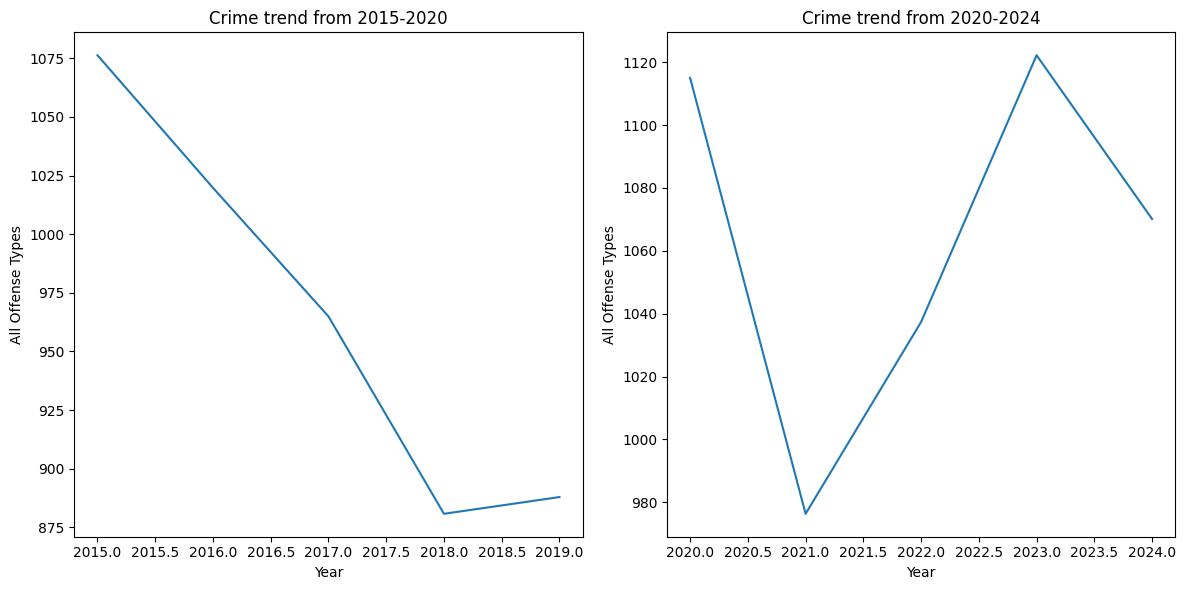

In [21]:
# Visualizing the rise/fall of crime rate over the past 10 years

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Crime trend from 2015-2020")
sns.lineplot(data=five_years_2015_2020, x="Year", y="All Offense Types", errorbar=None)

plt.subplot(1,2,2)
plt.title("Crime trend from 2020-2024")
sns.lineplot(data=five_years_2020_2024, x="Year", y="All Offense Types", errorbar=None)

plt.tight_layout()

<Axes: title={'center': 'Crime vs Median House Price - 2020-2024'}, xlabel='All Offense Types', ylabel='MEDIAN_LIST_PRICE'>

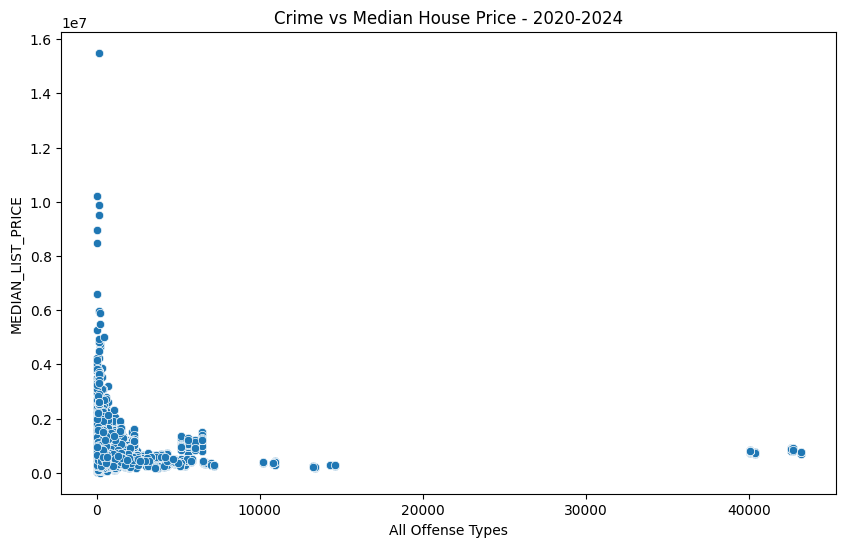

In [22]:
plt.figure(figsize=(10,6))
plt.title("Crime vs Median House Price - 2020-2024")
sns.scatterplot(data=five_years_2020_2024, x="All Offense Types", y="MEDIAN_LIST_PRICE")

<Axes: title={'center': 'Crime vs Median House Price - 2015-2020'}, xlabel='All Offense Types', ylabel='MEDIAN_LIST_PRICE'>

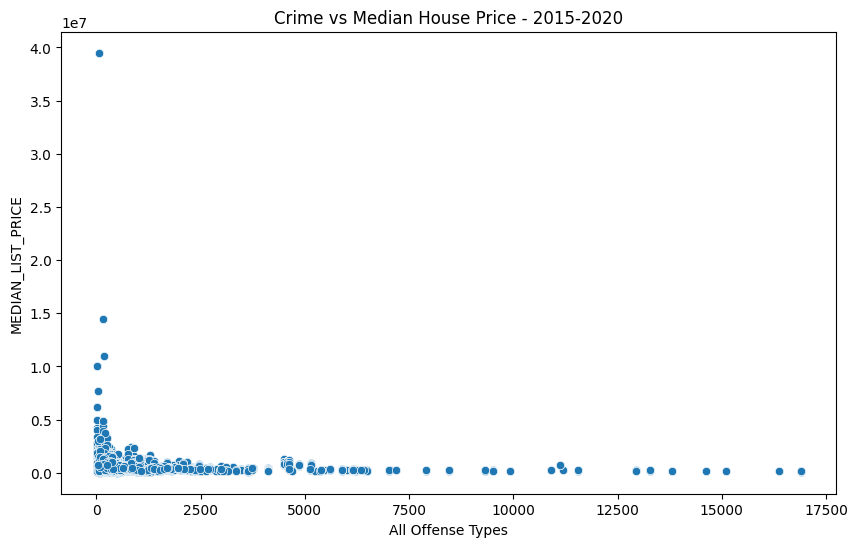

In [23]:
plt.figure(figsize=(10,6))
plt.title("Crime vs Median House Price - 2015-2020")
sns.scatterplot(data=five_years_2015_2020, x="All Offense Types", y="MEDIAN_LIST_PRICE")

In [24]:
# Annual prices grouped by city, listing year and total offenses
annual_prices = data.groupby(["CITY", "LISTING_YEAR", "All Offense Types"])["MEDIAN_LIST_PRICE"].median().reset_index()
annual_prices

,CITY,LISTING_YEAR,All Offense Types,MEDIAN_LIST_PRICE
0,Abington,2015,714.0,295750.0
1,Abington,2016,636.0,320000.0
2,Abington,2017,439.0,347450.0
3,Abington,2018,522.0,349900.0
4,Abington,2019,472.0,369000.0
...,...,...,...,...
2903,Yarmouth,2020,932.0,382499.5
2904,Yarmouth,2021,791.0,447500.0
2905,Yarmouth,2022,809.0,499350.0
2906,Yarmouth,2023,889.0,575000.0


* According to the above scatterplots, the crime rate does not have any significant impact on house prices.
* annual_prices dataset confirms that as well.
* Crime rates go up and down, but prices increase steadily.


## Can we classify whether a city is “Safe” or “Unsafe” based on housing and economic indicators?


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136377 entries, 0 to 136376
Data columns (total 90 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   PERIOD_BEGIN                                136377 non-null  object 
 1   PERIOD_END                                  136377 non-null  object 
 2   REGION_TYPE_ID                              136377 non-null  int64  
 3   REGION                                      136377 non-null  object 
 4   CITY                                        136377 non-null  object 
 5   STATE                                       136377 non-null  object 
 6   STATE_CODE                                  136377 non-null  object 
 7   PROPERTY_TYPE                               136377 non-null  object 
 8   PROPERTY_TYPE_ID                            136377 non-null  int64  
 9   MEDIAN_LIST_PRICE                           117766 non-null  float64
 

In [26]:
median_crime = data["All Offense Types"].median()

# Setting Safe for rows that have below median crimes and Unsafe for anything over median
data["SAFETY_LABEL"] = np.where(data["All Offense Types"] > median_crime,
                                "Unsafe",
                                "Safe")

In [27]:
categorical_features = ["CITY", "REGION", "PROPERTY_TYPE"]

numeric_features = [
    "MEDIAN_LIST_PRICE",
    "MEDIAN_PPSF",
    "HOMES_SOLD",
    "INVENTORY",
    "MEDIAN_DOM",
    "AVG_SALE_TO_LIST",
    "SOLD_ABOVE_LIST",
    "PRICE_DROPS"
]

# Selecting both numerical and categorical columns (rows) as features
X = data[numeric_features + categorical_features] # this will select all above features together from the dataset

# One hot encoding categorical columns only
X = pd.get_dummies(data=X, columns=categorical_features, drop_first=True)
X = X.fillna(X.mean())


Y = data["SAFETY_LABEL"]

In [28]:
# Encoding the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(Y)

In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data between test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42)

model.fit(X_train, Y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

Accuracy: 0.9572884587182872
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13663
           1       0.97      0.95      0.96     13613

    accuracy                           0.96     27276
   macro avg       0.96      0.96      0.96     27276
weighted avg       0.96      0.96      0.96     27276

[[13217   446]
 [  719 12894]]


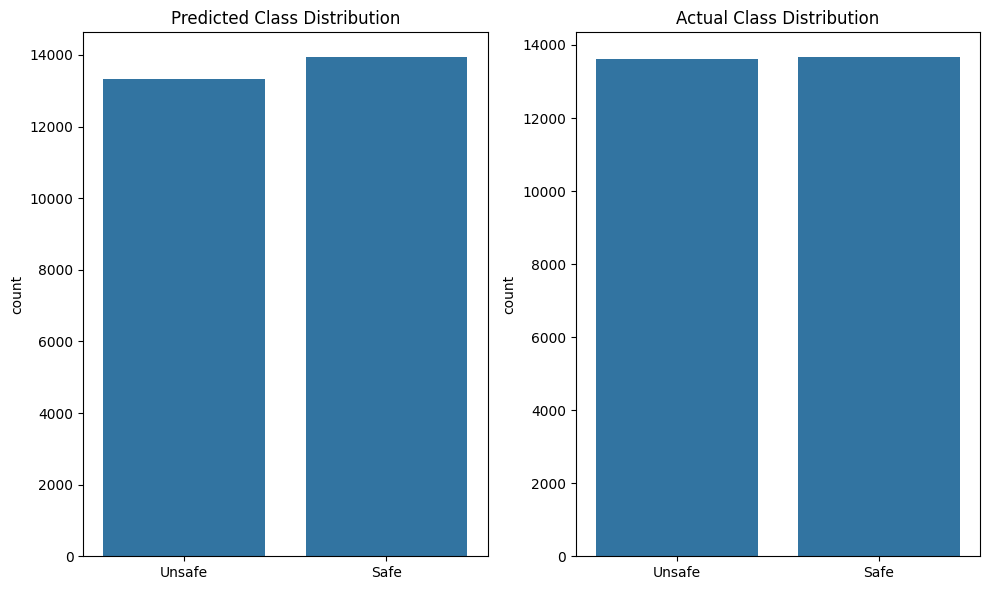

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
predicted_label = le.inverse_transform(predictions) # Decoding the encoding from 0-1 to Safe/Unsafe
sns.countplot(x=predicted_label)
plt.title("Predicted Class Distribution")

plt.subplot(1,2,2)
decoded_Y_test = le.inverse_transform(Y_test)
sns.countplot(x=decoded_Y_test)
plt.title("Actual Class Distribution")

plt.tight_layout()

## Can we forecast how changes in crime rates might affect future housing prices?

In [59]:
data.columns

Index(['PERIOD_BEGIN', 'PERIOD_END', 'REGION_TYPE_ID', 'REGION', 'CITY',
       'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MEDIAN_DOM', 'AVG_SALE_TO_LIST', 'SOLD_ABOVE_LIST',
       'PRICE_DROPS', 'PRICE_DROPS_MOM', 'PRICE_DROPS_YOY',
       'PARENT_METRO_REGION', 'LISTING_YEAR', 'All Offense Types',
       'Crimes Against Person', 'Murder and Nonnegligent Manslaughter',
       'Negligent Manslaughter', 'Justifiable Homicide',
       'Kidnapping/Abduction', 'All Rape', 'Rape', 'Sodomy',
       'Sexual Assault With An Object', 'Criminal Sexual Contact', 'Incest',
       'Statutory Rape', 'Aggravated Assault', 'Simple Assault',
       'Intimidation', '

In [99]:
# Converting PERIOD_BEGIN into datetime and sorting
data["PERIOD_BEGIN"] = pd.to_datetime(data["PERIOD_BEGIN"])
data = data.sort_values("PERIOD_BEGIN")

In [100]:
data

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE_ID,REGION,CITY,STATE,STATE_CODE,PROPERTY_TYPE,PROPERTY_TYPE_ID,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,MEDIAN_LIST_PRICE_YOY,MEDIAN_PPSF,MEDIAN_PPSF_MOM,MEDIAN_PPSF_YOY,MEDIAN_LIST_PPSF,MEDIAN_LIST_PPSF_MOM,MEDIAN_LIST_PPSF_YOY,HOMES_SOLD,HOMES_SOLD_MOM,HOMES_SOLD_YOY,INVENTORY,INVENTORY_MOM,INVENTORY_YOY,MEDIAN_DOM,AVG_SALE_TO_LIST,SOLD_ABOVE_LIST,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,PARENT_METRO_REGION,LISTING_YEAR,All Offense Types,Crimes Against Person,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,Kidnapping/Abduction,All Rape,Rape,Sodomy,Sexual Assault With An Object,Criminal Sexual Contact,Incest,Statutory Rape,Aggravated Assault,Simple Assault,Intimidation,"Human Trafficking, Commercial Sex Acts","Human Trafficking, Involuntary Servitude",Crimes Against Property,Arson,Bribery,Burglary/Breaking & Entering,Counterfeiting/Forgery,Destruction/Damage/Vandalism of Property,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Credit Card/Automatic Teller Fraud,Impersonation,Welfare Fraud,Wire Fraud,Identity Theft,Hacking/Computer Invasion,Robbery,Pocket-picking,Purse-snatching,Shoplifting,Theft From Building,Theft From Coin Operated Machine or Device,Theft From Motor Vehicle,Theft of Motor Vehicle Parts/Accessories,All Other Larceny,Motor Vehicle Theft,Stolen Property Offenses,Crimes Against Society,Drug/Narcotic Violations,Drug Equipment Violations,Betting/Wagering,Operating/Promoting/Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prostitution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Animal Cruelty,Year,SAFETY_LABEL
25629,2015-01-01,2015-01-31,6,"Eastham, MA",Eastham,Massachusetts,MA,All Residential,-1,425000.00000,0.118715,0.065163,160.263857,-0.410093,-0.585506,258.433735,-0.112655,-0.051762,4.0,-0.733333,-0.666667,122.0,0.000000,0.196078,121.0,0.919859,0.000000,NaN,NaN,NaN,"Barnstable Town, MA",2015,174.0,58.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,18.0,31.0,4.0,0.0,0.0,106.0,0.0,0.0,7.0,0.0,18.0,1.0,0.0,9.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,6.0,0.0,46.0,0.0,1.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,Safe
105619,2015-01-01,2015-01-31,6,"Great Barrington, MA",Great Barrington,Massachusetts,MA,Single Family Residential,6,532587.97757,NaN,NaN,219.332025,0.401267,2.640537,NaN,NaN,NaN,2.0,-0.500000,1.000000,11.0,-0.266667,0.222222,135.0,0.963636,0.000000,NaN,NaN,NaN,"Pittsfield, MA",2015,187.0,61.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,14.0,37.0,4.0,0.0,0.0,113.0,1.0,0.0,13.0,5.0,25.0,3.0,0.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,12.0,14.0,0.0,1.0,0.0,21.0,3.0,3.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015,Safe
44787,2015-01-01,2015-01-31,6,"Marshfield, MA",Marshfield,Massachusetts,MA,All Residential,-1,404450.00000,0.348616,0.067150,267.349696,0.202629,0.389992,214.083524,0.142350,0.095127,12.0,-0.538462,-0.500000,112.0,-0.081967,-0.058824,140.0,0.953422,0.000000,0.133929,0.010978,0.024685,"Boston, MA",2015,403.0,119.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,41.0,51.0,24.0,0.0,0.0,245.0,0.0,0.0,11.0,3.0,97.0,2.0,0.0,8.0,1.0,9.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,10.0,17.0,0.0,18.0,1.0,59.0,5.0,1.0,39.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,2015,Unsafe
80683,2015-01-01,2015-01-31,6,"Holbrook, MA",Holbrook,Massachusetts,MA,Single Family Residential,6,214400.00000,-0.190638,-0.175067,154.791155,-0.183404,-0.156711,188.164138,0.058038,0.150286,9.0,-0.400000,0.000000,27.0,-0.035714,-0.228571,91.0,0.984124,0.333333,0.296296,0.153439,0.182011,"Boston, MA",2015,407.0,108.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,40.0,44.0,13.0,0.0,0.0,277.0,0.0,0.0,27.0,5.0,83.0,5.0,1.0,16.0,4.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,3.0,22.0,0.0,17.0,1.0,56.0,12.0,13.0,22.0,15.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,2015,Unsafe
21634,2015-01-01,2015-01-31,6,"Belmont, MA",Belmont,Massachusetts

In [68]:
# Fixing Null values with the mean 
data["MEDIAN_LIST_PRICE"] = data["MEDIAN_LIST_PRICE"].fillna(data["MEDIAN_LIST_PRICE"].mean())

In [101]:
# Adding time series lags
data["price_lag_1"] = data["MEDIAN_LIST_PRICE"].shift(1)
data['price_lag_3'] = data['MEDIAN_LIST_PRICE'].shift(3)
data['crime_lag_1'] = data['All Offense Types'].shift(1)
data['crime_lag_3'] = data['All Offense Types'].shift(3)

In [107]:
# Filling Nulls
data["price_lag_1"] = data["MEDIAN_LIST_PRICE"].fillna(data["MEDIAN_LIST_PRICE"].mean())
data['price_lag_3'] = data["MEDIAN_LIST_PRICE"].fillna(data["MEDIAN_LIST_PRICE"].mean())
data['crime_lag_1'] = data['All Offense Types'].fillna(data["All Offense Types"].mean())
data['crime_lag_3'] = data['All Offense Types'].fillna(data["All Offense Types"].mean())

In [108]:
train = data[data['PERIOD_BEGIN'] < '2023-01-01']
test  = data[data['PERIOD_BEGIN'] >= '2023-01-01']

In [109]:
X_train

,price_lag_1,price_lag_3,All Offense Types,crime_lag_1,crime_lag_3,Crimes Against Person,Crimes Against Property
25629,NaN,NaN,174.0,NaN,NaN,58.0,106.0
105619,425000.00000,NaN,187.0,174.0,NaN,61.0,113.0
44787,532587.97757,NaN,403.0,187.0,NaN,119.0,245.0
80683,404450.00000,425000.00000,407.0,403.0,174.0,108.0,277.0
21634,214400.00000,532587.97757,363.0,407.0,187.0,38.0,310.0
...,...,...,...,...,...,...,...
135524,543400.00000,269900.00000,2047.0,199.0,3155.0,520.0,1384.0
57296,209900.00000,532587.97757,1676.0,2047.0,219.0,434.0,1204.0
68726,532587.97757,543400.00000,234.0,1676.0,199.0,35.0,189.0
107387,532587.97757,209900.00000,1998.0,234.0,2047.0,696.0,1204.0


In [110]:
features = [
    'price_lag_1', 'price_lag_3',
    'All Offense Types', 'crime_lag_1', 'crime_lag_3',
    'Crimes Against Person', 'Crimes Against Property'
]

X_train = train[features]
y_train = train["MEDIAN_LIST_PRICE"]

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
X_test = test[features]
predicted = model.predict(X_test)
test['predicted_price'] = predicted

/var/folders/yy/sflsldw51q153fp_63bn4ryh0000gn/T/ipykernel_30486/3168089285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price'] = predicted


Each coefficient represents how much the target (house price) changes when one feature increases by 1 unit, assuming all other features stay the same.

| Feature                 | Coefficient | Meaning                                                                                                                  |
| ----------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------ |
| All Offense Types       | -243.91     | For each additional crime, the model predicts the median house price decreases by $243.91                                |
| Crimes Against Person   | +333.73     | For each additional personal crime, house prices increase by $333.73 (unexpected but possible due to correlation issues) |
| Crimes Against Property | +303.24     | Similar interpretation                                                                                                   |
| Crimes Against Society  | -880.88     | For each “society crime,” prices decrease by $880.88                                                                     |

In [116]:
coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coef

,Feature,Coefficient
0,price_lag_1,5.000000e-01
1,price_lag_3,5.000000e-01
2,All Offense Types,9.403889e-14
3,crime_lag_1,9.403889e-14
4,crime_lag_3,9.403889e-14
5,Crimes Against Person,-4.046004e-13
6,Crimes Against Property,-2.261479e-13


Text(0.5, 1.0, 'Predicted vs Actual Housing Prices')

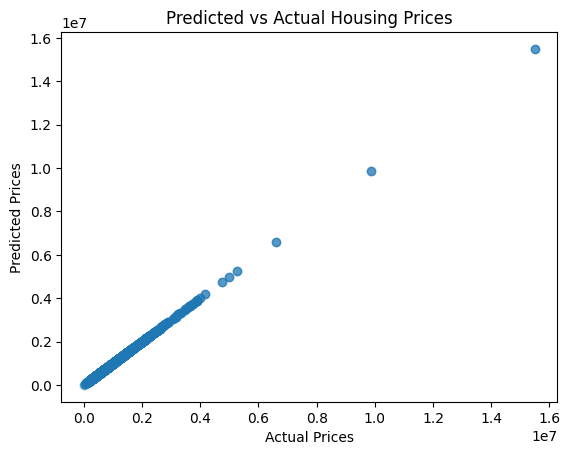

In [121]:
y_test = test["MEDIAN_LIST_PRICE"]

plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Housing Prices")